# A Random Walk Down Wall Street

November, 2020

There is a theory that says that the price of stocks is similar to a "random walk"...this page summarizes the theory pretty well. https://www.investopedia.com/terms/r/randomwalktheory.asp

To me the takeaway is: experts are not able to beat the market consistently. So, investors would be better off investing in a passive fund that charges far lower management fees.  Purchasing the advice of experts takes more money than just buying an index.

Now, I do personally believe it is possible for short terms and with very focused attention you can beat the market.  Just look at Warren Buffett.  

But, do you want to pay that much attention to the market?  If so, go right ahead.  But, if not, just buy an index fund and relax.

Now, which index do you want to buy?  You want to buy one that matches your risk/reward profile & how soon you will be using that money you are investing.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

We can simulate this in python and plot some potential possible futures.  

In [44]:
def simulate_stock_changes(annual_rate,volatility,years):
    return np.random.normal(loc=annual_rate,scale=volatility,size=years*365)

def simulate_stock_price(starting_price,annual_rate,volatility,years):
    scaled_rate = starting_price*annual_rate
    scaled_volatility = starting_price*volatility
    changes = simulate_stock_changes(scaled_rate,scaled_volatility,years)
    return np.cumsum(changes) + starting_price

def plot_stock_price(starting_price,annual_rate,volatility,years):
    x = np.arange(years*365)/365
    plt.plot(x,simulate_stock_price(starting_price,annual_rate,volatility,years))

## S&P 500

The S&P 500 Stock Index has a long-term average annual growth rate of 7-10% and it has it has a standard deviation of around 1.2 according to a few minutes of googling.

In [45]:
daily_rate        = 0.1/365
daily_volatility  = 1.2/365 # (I'm not 100% sure this is right, but it gives reasonable results)

The Current S&P is about 3000.  Simulating one future is interesting, but simulating multiple futures is much more useful.  Here are 50 future possibilties...

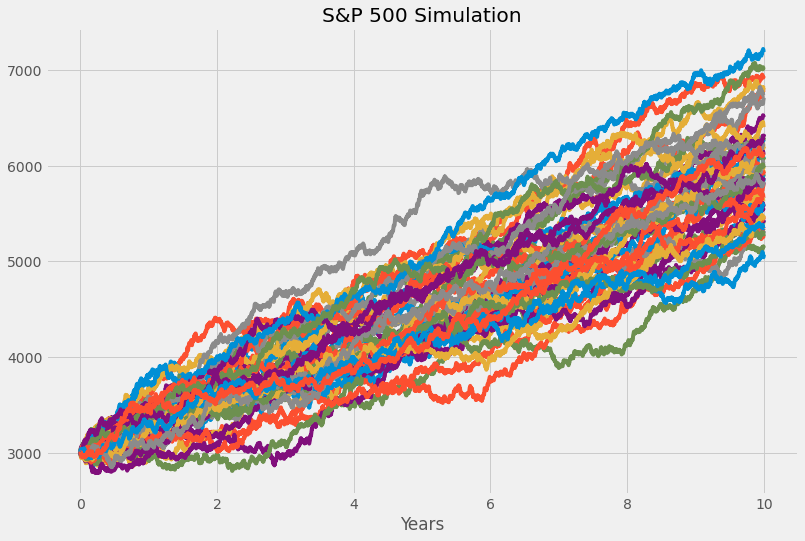

In [47]:
np.random.seed(11010) # allow for repeatablity control
plt.figure(figsize=(12,8))
plt.title("S&P 500 Simulation")
plt.xlabel("Years")
for _ in range(50):
    plot_stock_price(3000,daily_rate,daily_volatility,10)

The main thing I want you to see here is that you must consider your time horizon for when you want to use this money you are investing.  If you are looking at a 5 or 10 year time horizon, then by all means, this S&P 500 index might be the right one for you.  It is simple, easy to buy and provides a great return.  Every single return is positive over the 5-10 year time period.  

But, if you are wanting to use that money for something in the next year or two, some of these simulations show that you will not make money, sometimes you might have less money than you started with.  If you are counting on that money, that'll be a problem.

Typically, there is a relation between rates of return & volatility.  If you want safety, you will accept lower returns.  Alternatively, if you are risking your money you will demand higher returns.

Let's picture a less volitile investment.  Perhaps a bond fund?  (We'll keep today's price at 3000 to match the S&P for simplicity)

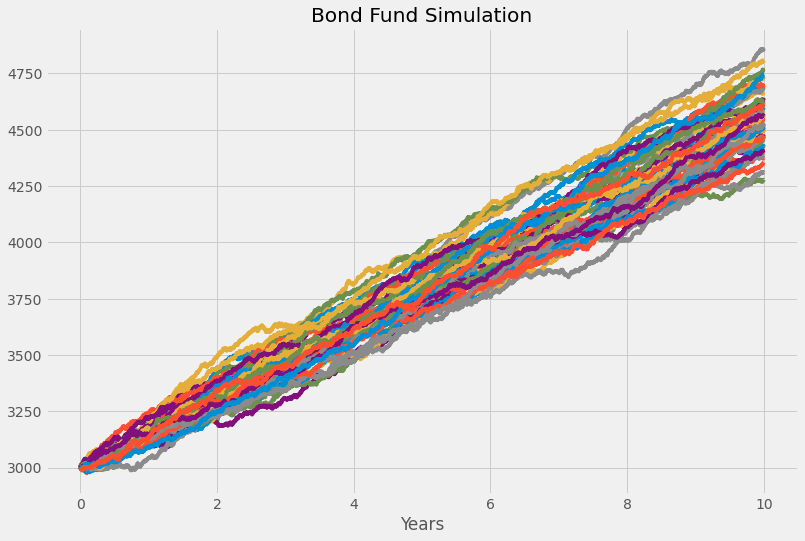

In [50]:
bond_daily_rate        = 0.05/365   # 5% return (typical of bond funds)
bond_daily_volatility  = 0.25/365   # lower stddev (NOTE, I'm just making this number up!)
np.random.seed(11) # allow for repeatablity control
plt.figure(figsize=(12,8))
plt.title("Bond Fund Simulation")
plt.xlabel("Years")
for _ in range(50):
    plot_stock_price(3000,bond_daily_rate,bond_daily_volatility,10)

Now, with a less volatile investment, you get both a shorter safe time horizon, but you lose out on the bigger gains if you had a longer time horizon.

How about a riskier investment class?  Perhaps a single sector of the market?

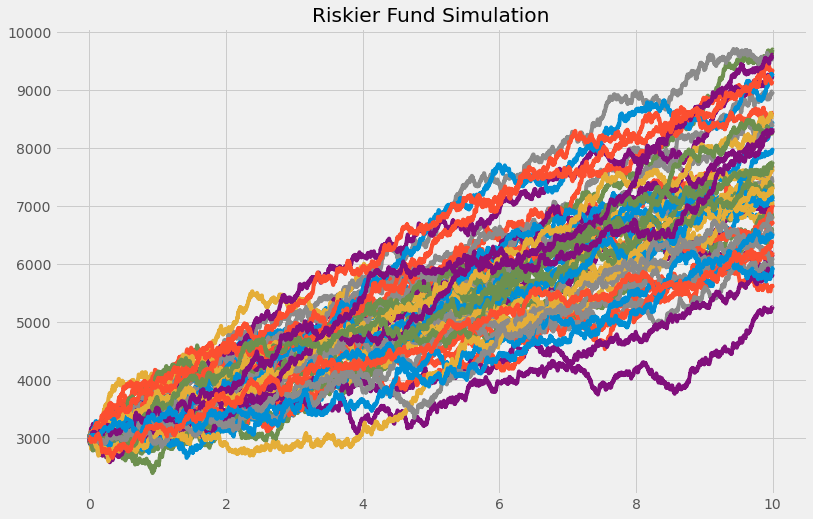

In [51]:
bond_daily_rate        = 0.15/365  # 18% avg return  (NOTE, I'm just making this number up!)
bond_daily_volatility  = 2.2/365   # higher stddev  (NOTE, I'm just making this number up!)
np.random.seed(808) # allow for repeatablity control
plt.figure(figsize=(12,8))
plt.title("Riskier Fund Simulation")
for _ in range(50):
    plot_stock_price(3000,bond_daily_rate,bond_daily_volatility,10)

With higher risks, come higher rewards--but at the cost of looking quite bad for a few years!